In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("/home/klay/PycharmProjects/LLM-Logic-Eval/dataframes/evaluation_spreadsheet.xlsx")

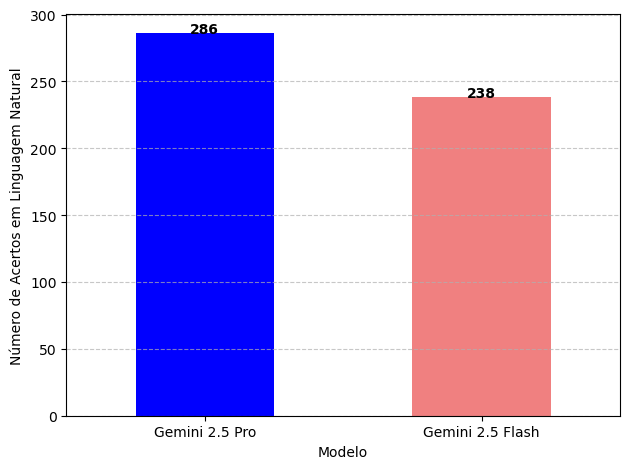

In [89]:
tes = (df[df["correct_answer"] == df["gemini_2.5_pro_answer"]])
teste_flash = (df[df["correct_answer"] == df["gemini_2.5_flash_answer"]])
contador_pro = 0
contador_flash = 0
res = tes["correct_answer"].tolist()
tipo_pro = tes["task_type"].tolist()
tes = (df[df["correct_answer"] == df["gemini_2.5_flash_answer"]])
tipo_flash = tes["task_type"].tolist()
flash_res = tes["correct_answer"].tolist()
for i in res:
    contador_pro += 1
for i in flash_res:
    contador_flash += 1
dados_contagens = pd.Series(
    [contador_pro, contador_flash],
    index=['Gemini 2.5 Pro', 'Gemini 2.5 Flash'],
    name='Acertos'
)
dados_contagens.plot(kind='bar',color=['blue','lightcoral'])
plt.ylabel('Número de Acertos em Linguagem Natural')
plt.xlabel('Modelo')
plt.xticks(rotation=0)

for i, v in enumerate(dados_contagens):
    plt.text(i, v + 0.5, str(v), color='black', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [93]:
bqa_rate_flash = 0
mcqa_rate_flash = 0
bqa_rate_pro = 0
mcqa_rate_pro = 0
for i in tipo_flash:
    if i == 'BQA':
        bqa_rate_flash += 1
    else:
        mcqa_rate_flash += 1
for i in tipo_pro:
    if i == 'BQA':
        bqa_rate_pro += 1
    else:
        mcqa_rate_pro += 1
pro = [bqa_rate_pro,mcqa_rate_pro]
flash = [bqa_rate_flash,mcqa_rate_flash]

[196, 90]
[180, 58]


<Figure size 1000x600 with 0 Axes>

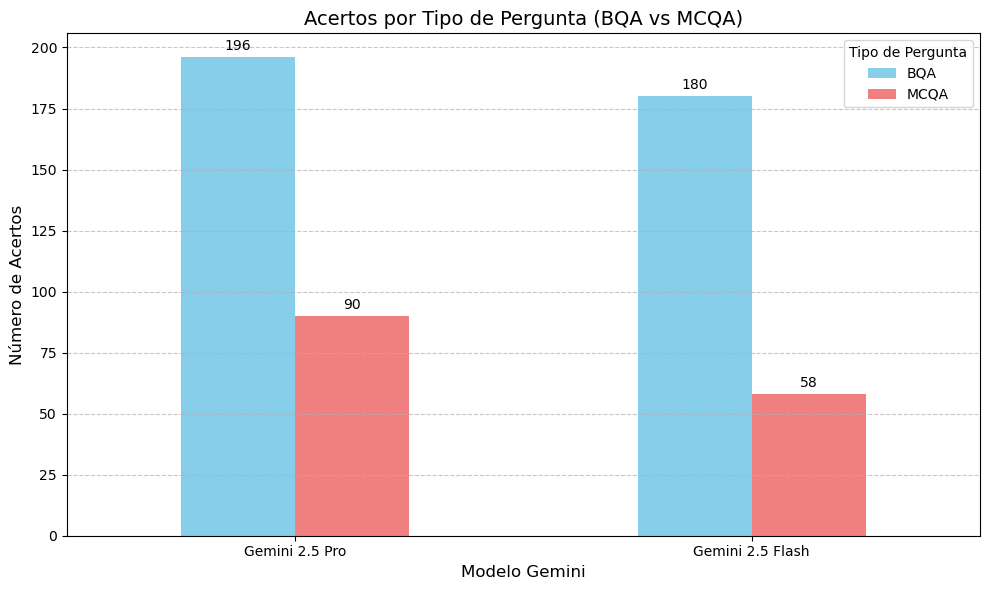

In [94]:
data = {
    'BQA': [pro[0], flash[0]],
    'MCQA': [pro[1], flash[1]]
}
index_nomes = ['Gemini 2.5 Pro', 'Gemini 2.5 Flash']
df_acertos = pd.DataFrame(data, index=index_nomes)

plt.figure(figsize=(10, 6))
ax = df_acertos.plot(
    kind='bar',
    rot=0,
    figsize=(10, 6),
    color=['skyblue', 'lightcoral']
)

# Adicionar títulos, rótulos e valores nas barras
plt.title('Acertos por Tipo de Pergunta (BQA vs MCQA)', fontsize=14)
plt.ylabel('Número de Acertos', fontsize=12)
plt.xlabel('Modelo Gemini', fontsize=12)
plt.legend(title='Tipo de Pergunta', loc='upper right')

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()